<a href="https://colab.research.google.com/github/ckokobean/SFUHS-Computational-Modeling-and-Simulation/blob/master/COVID_19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration of COVID-19 Global Confirmed Cases and Growth Factors**

Catherine Ko

Computational Modeling & Simulation - Quarter 4

Text last updated: April 2, 2020

In light of the rapidly-evolving global pandemic regarding the COVID-19 disease caused by the SARS-CoV2 virus, I wanted to...

1) analyze the growth of the number of confirmed cases around the world through line graphs of confirmed cases over time and 

2) explore growth factor to analytically try to detect inflection points for the logistic growth of the disease and thus predict at what number of confirmed cases will a country level out.

## Manipulating data

First I retrieved data from a Github repository organized by the Johns Hopkins University Center for Systems Science and Engineering:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load in dataset
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df

Province/State         Country/Region  ...  4/6/20  4/7/20
0                            NaN            Afghanistan  ...     367     423
1                            NaN                Albania  ...     377     383
2                            NaN                Algeria  ...    1423    1468
3                            NaN                Andorra  ...     525     545
4                            NaN                 Angola  ...      16      17
..                           ...                    ...  ...     ...     ...
258  Falkland Islands (Malvinas)         United Kingdom  ...       2       2
259    Saint Pierre and Miquelon                 France  ...       1       1
260                          NaN            South Sudan  ...       1       2
261                          NaN         Western Sahara  ...       4       4
262                          NaN  Sao Tome and Principe  ...       4       4

[263 rows x 81 columns]

The data we are given includes details on location and the number of confirmed cases each day from 1/22/20 to present for 258 places.

In [0]:
#replacing the NA values in Province/State column as nothing ''
df['Province/State'].fillna('',inplace=True)

# concatenate Province/State and Country/Region in the Country/Region column
df['Country/Region']=df['Province/State'] + ' '+ df["Country/Region"]

In [3]:
# drop the columns 'Province/State', 'Lat', and 'Long' because I won't be using them
df = df.drop(columns=['Province/State','Lat','Long'],axis=1)

# get rid of leading unnecessary spaces
df['Country/Region']=df['Country/Region'].str.strip()
df

Country/Region  1/22/20  ...  4/6/20  4/7/20
0                                   Afghanistan        0  ...     367     423
1                                       Albania        0  ...     377     383
2                                       Algeria        0  ...    1423    1468
3                                       Andorra        0  ...     525     545
4                                        Angola        0  ...      16      17
..                                          ...      ...  ...     ...     ...
258  Falkland Islands (Malvinas) United Kingdom        0  ...       2       2
259            Saint Pierre and Miquelon France        0  ...       1       1
260                                 South Sudan        0  ...       1       2
261                              Western Sahara        0  ...       4       4
262                       Sao Tome and Principe        0  ...       4       4

[263 rows x 78 columns]

In [4]:
# tranpose dataframe 
df = df.transpose()
df

0        1    ...             261                    262
Country/Region  Afghanistan  Albania  ...  Western Sahara  Sao Tome and Principe
1/22/20                   0        0  ...               0                      0
1/23/20                   0        0  ...               0                      0
1/24/20                   0        0  ...               0                      0
1/25/20                   0        0  ...               0                      0
...                     ...      ...  ...             ...                    ...
4/3/20                  281      304  ...               0                      0
4/4/20                  299      333  ...               0                      0
4/5/20                  349      361  ...               4                      0
4/6/20                  367      377  ...               4                      4
4/7/20                  423      383  ...               4                      4

[78 rows x 263 columns]

In [0]:
#@title
# want to make the headers the first row 
new_header = df.iloc[0] #grab the first row for the header

In [0]:
#@title
# create df_less dataframe which is df minus the first row
df_less = df[1:] 

# make the headers of df_less dataframe equal to the countries/regions 
df_less.columns=new_header

In [0]:
#@title
'''
#https://matplotlib.org/gallery/subplots_axes_and_figures/broken_axis.html#sphx-glr-gallery-subplots-axes-and-figures-broken-axis-py 

f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(20,80))

# plot the same data on both axes
ax.plot(dates,df_less_array,alpha=.5)
ax2.plot(dates,df_less_array,alpha=.5)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1800, )  # outliers only
ax2.set_ylim(0, 1500)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

ax2.legend(new_header)
plt.show()
''';

In [0]:
#@title
# creating an array of countries/regions vertically stacked on top of the corresponding current growth factors on top of the corresponding array of confirmed cases 
# [country region,...],[current growth factors,...],[arrays of confirmed cases,...]

array=np.array(df_less[df_less.columns])
lastrow=array[-1:]
penultimate=array[-2:-1,]
penultimate[penultimate==0]=1 # !!!!!!! super efficient line of vectorized code!! replace all 0's with 1!! so that there is no division over 0
gfs=lastrow/penultimate

namesandgfsandarrays=np.vstack((new_header,gfs,array))
df_three=pd.DataFrame(data=namesandgfsandarrays)

Ultimately, I got a dataframe whose columns are sorted by ascending order of row 73 (most recent number of confirmed cases).  

In [9]:
# creates a new dataframe named sorteddf2 that is the sorted version of df_three, sorted by ascending latest value of confirmed cases (row index days + 1)

# store the 1st output of df_less.shape in the variable days and store the 2nd output of df_less.shape in variable numberofregions
days,numberofregions=df_less.shape

sorteddf2=df_three.sort_values(by=[days+1],axis=1)
sorteddf2_new=pd.DataFrame(sorteddf2,columns=df_three.sort_values(by=[days+1],axis=1).loc[0])
hi2=df_three.sort_values(by=[days+1],axis=1).loc[0]
hi2=hi2.reset_index(drop=True)

sorteddf2.columns=hi2
sorteddf2.tail()

0  Diamond Princess Canada Recovered Canada Tibet China  ...   Italy   Spain      US
74                       0                0           1  ...  119827  119199  275586
75                       0                0           1  ...  124632  126168  308850
76                       0                0           1  ...  128948  131646  337072
77                       1                1           1  ...  132547  136675  366667
78                       0                0           1  ...  135586  141942  396223

[5 rows x 263 columns]

# Confirmed cases of COVID-19 over time

I wanted to look at the confirmed cases over time for multiple countries around the world. So, I created a function to help me plot the data for a range of countries over time:

In [0]:
'https://matplotlib.org/gallery/showcase/bachelors_degrees_by_gender.html#sphx-glr-gallery-showcase-bachelors-degrees-by-gender-py'

countriesbyconfirmedcases = np.array(sorteddf2.columns)

# make an array with the dates
dates = pd.date_range('1/22/2020', periods=days)

def confirmedcasesgraph(top,bottom,title,labelfontsize=14):

  fig, ax = plt.subplots(1, 1, figsize=(12, 14))

  # Remove the plot frame lines. They are unnecessary here.
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Provide tick lines across the plot to help your viewers trace along
  # the axis ticks. Make sure that the lines are light and small so they
  # don't obscure the primary data lines.
  ax.grid(True, 'major', axis='both', ls='--', lw=.5, c='k', alpha=.3)

  # Remove the tick marks; they are unnecessary with the tick lines we just
  # plotted. Make sure your axis ticks are large enough to be easily read.
  # You don't want your viewers squinting to read your plot.
  ax.tick_params(axis='both', which='both', labelsize=14,
                bottom=False, top=False, labelbottom=True,
                left=False, right=False, labelleft=True)

  for column in countriesbyconfirmedcases[top:bottom]:
      # Plot each line separately with its own color.
      #column_rec_name = column.replace('\n', '_').replace(' ', '_')

      line, = plt.plot(dates, sorteddf2[column][2:days+2],
                      lw=2.5,alpha=.8)

      # Add a text label to the right end of every line. Most of the code below
      # is adding specific offsets y position because some labels overlapped.

      #if column in y_offsets:
          #y_pos += y_offsets[column]

      # Again, make sure that all labels are large enough to be easily read
      # by the viewer.
      ax.text(dates[-1], sorteddf2[column][days+1], column+': ' + str(sorteddf2[column][days+1]), fontsize=labelfontsize, color=line.get_color(),alpha=.8)

  fig.suptitle("Confirmed Cases of COVID-19 over time for " + str(title) , fontsize=18, ha="center",y=+.9)
  ax.set_xlabel('Time',fontsize=18)
  ax.set_ylabel('Confirmed Cases',fontsize=18)
  plt.show()

## Confirmed cases of COVID-19 over time for all countries

Here's the graph for confirmed cases over time for all the countries. As shown, US is in the lead for most confirmed cases of COVID-19, followed by Italy, Spain, Germany, Hubei China (which looks to have maxed out already though), France, Iran, UK, etc. Though most countries still have very few confirmed cases, the rapidly-evolving nature of exponential growth could quickly change that.

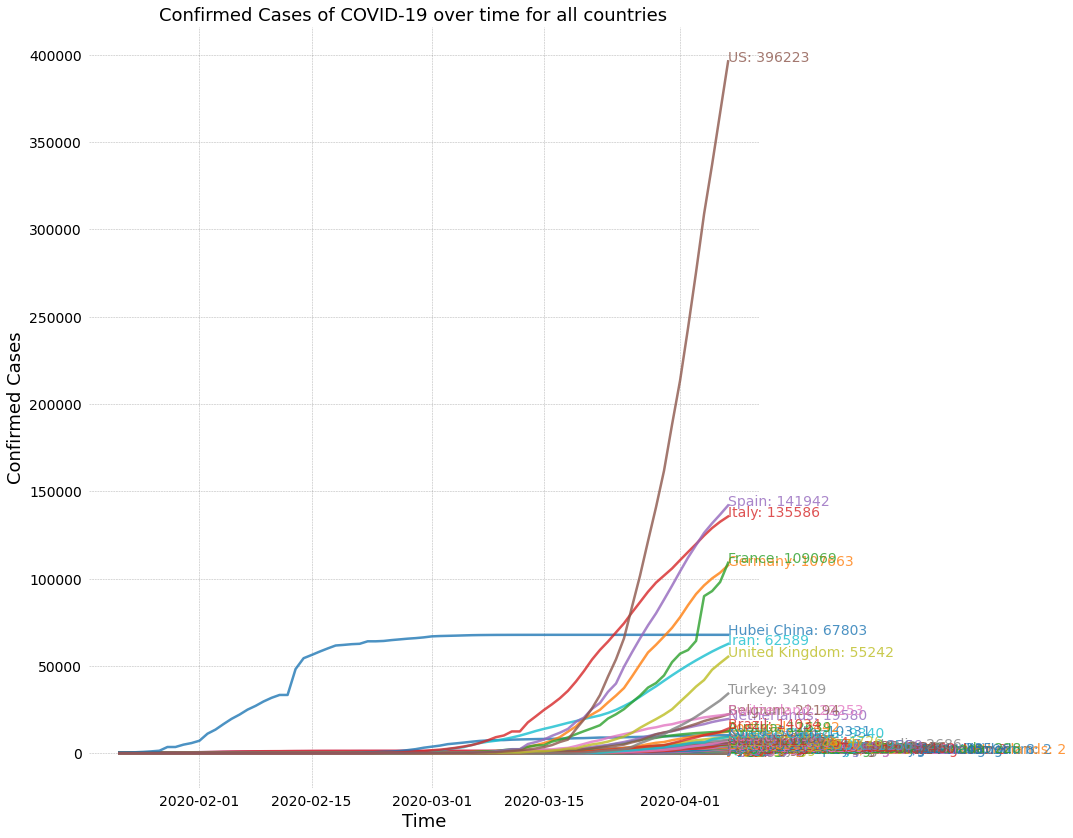

In [11]:
confirmedcasesgraph(-256,None,'all countries')

## Confirmed cases of COVID-19 over time for leading 10 countries

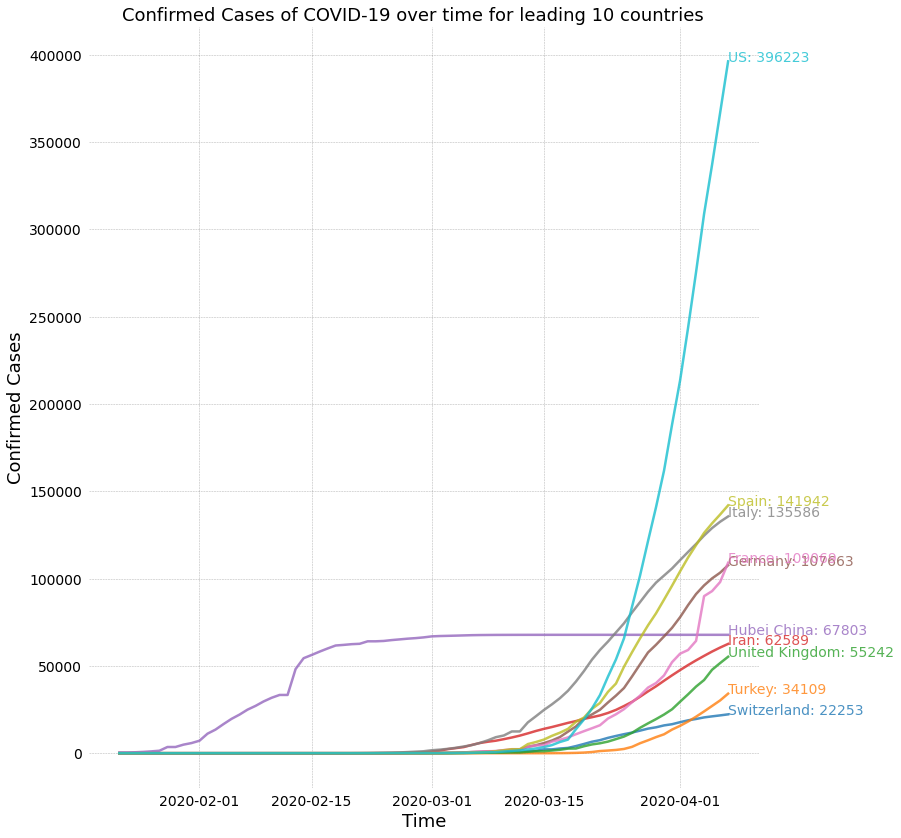

In [12]:
# print confirmed cases graph for top 10
confirmedcasesgraph(-10,None,'leading 10 countries')

## Confirmed cases of COVID-19 over time for leading 10–50 countries

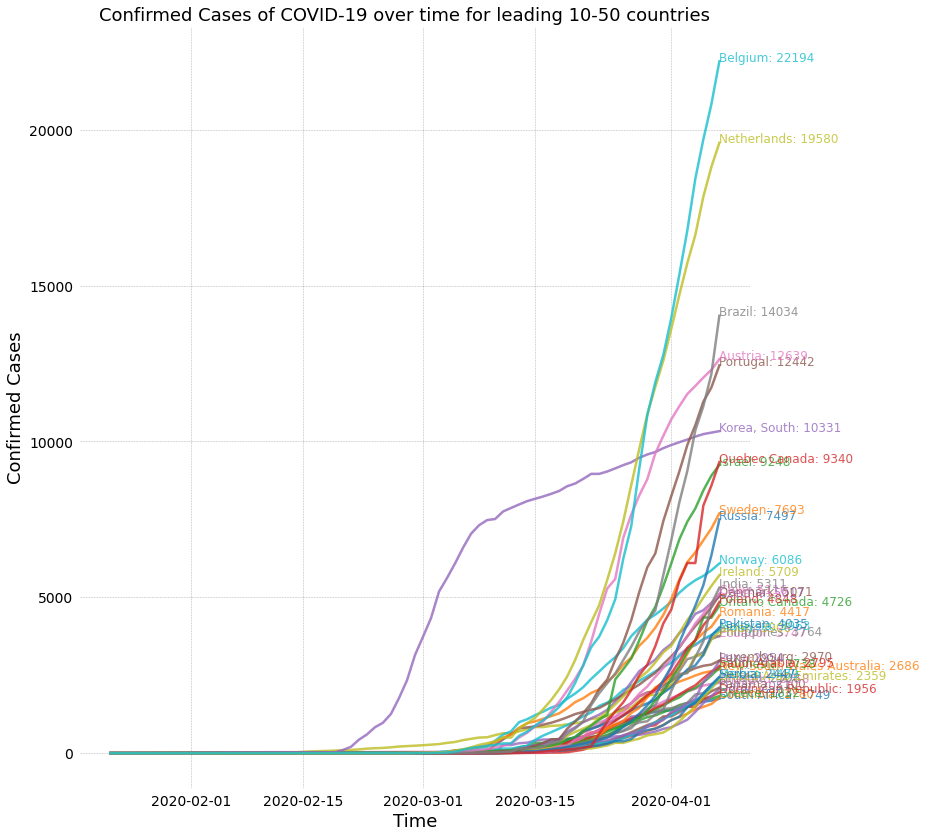

In [13]:
confirmedcasesgraph(-50,-10,'leading 10-50 countries',labelfontsize=12)

##Confirmed cases of COVID-19 over time for leading 10–50 countries

In this slice of the data, we can see that many provinces in China have already levelled out while other countries around the world are now shooting up, with no inflection point in sight.

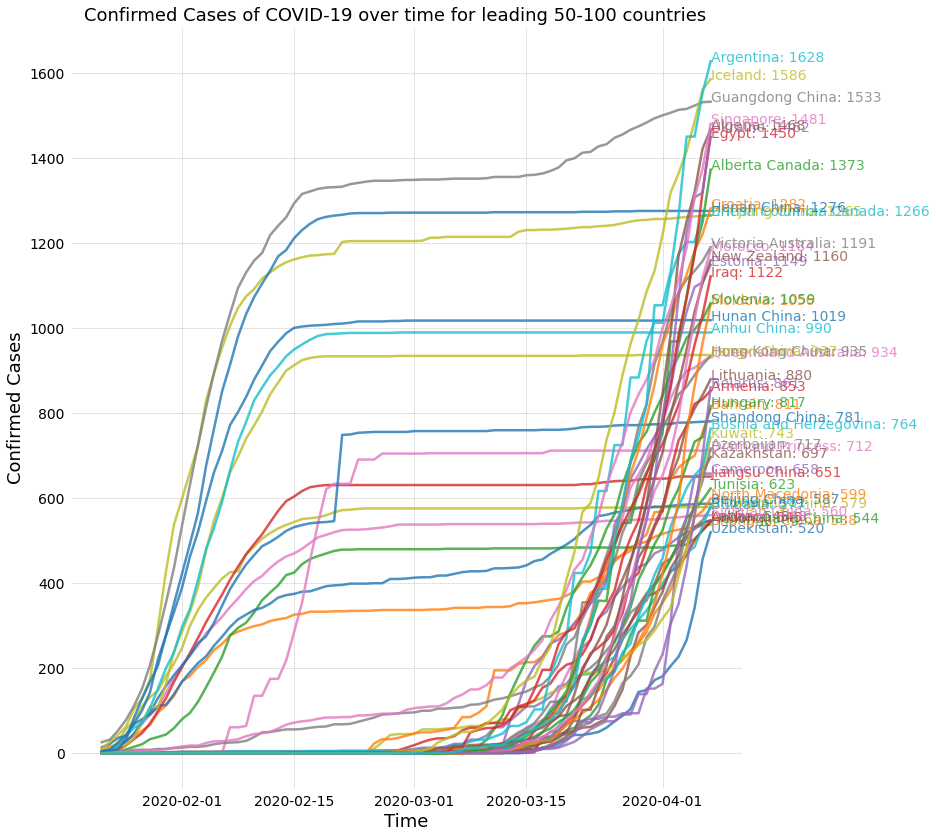

In [14]:
confirmedcasesgraph(-100,-50,'leading 50-100 countries')

## Confirmed cases of COVID-19 over time for leading 100-170 countries

Similar to the previous graph, this section also shows Chinese provinces having levelled out while other countries' confirmed cases surge up.

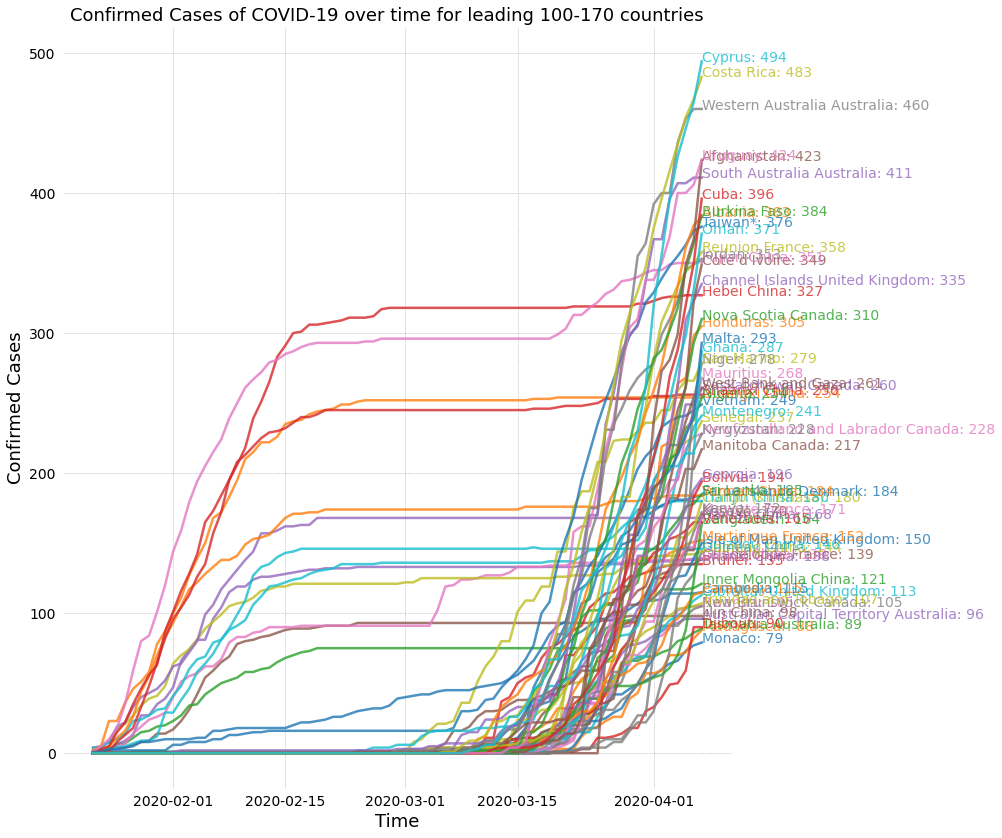

In [15]:
confirmedcasesgraph(-170,-100,'leading 100-170 countries')

#Analysis of Growth Factor: looking for inflection points to predict max number of cases (when growth factor = 1)

The growth factor is calculated by taking the ratio of two successive changes from one day to the next of confirmed cases.

Growth Factor = number of new cases one day / number of new cases the previous day

When you are on the exponential part of the logistic curve, the growth factor is > 1. When the growth factor hits 1, it may be a sign that you are near the inflection point. The number of confirmed cases at the inflection point tells us that the total number of cases will max out around 2 times the inflection point.




Here I plotted graphs of confirmed cases over time for all of the countries just to take a look at the shapes of the logistic curves. I used this to peak out interesting looking graphs to analyze the growth factor for below. 

*This was initally supposed to be sorted by ascending growth factor but I calculated growth factor incorrectly and realized at the last minute but this is correctly sorted by incorrect growth factor so I guess I was able to learn how to sort dataframes from this ¯\\\_(ツ)_/¯ .

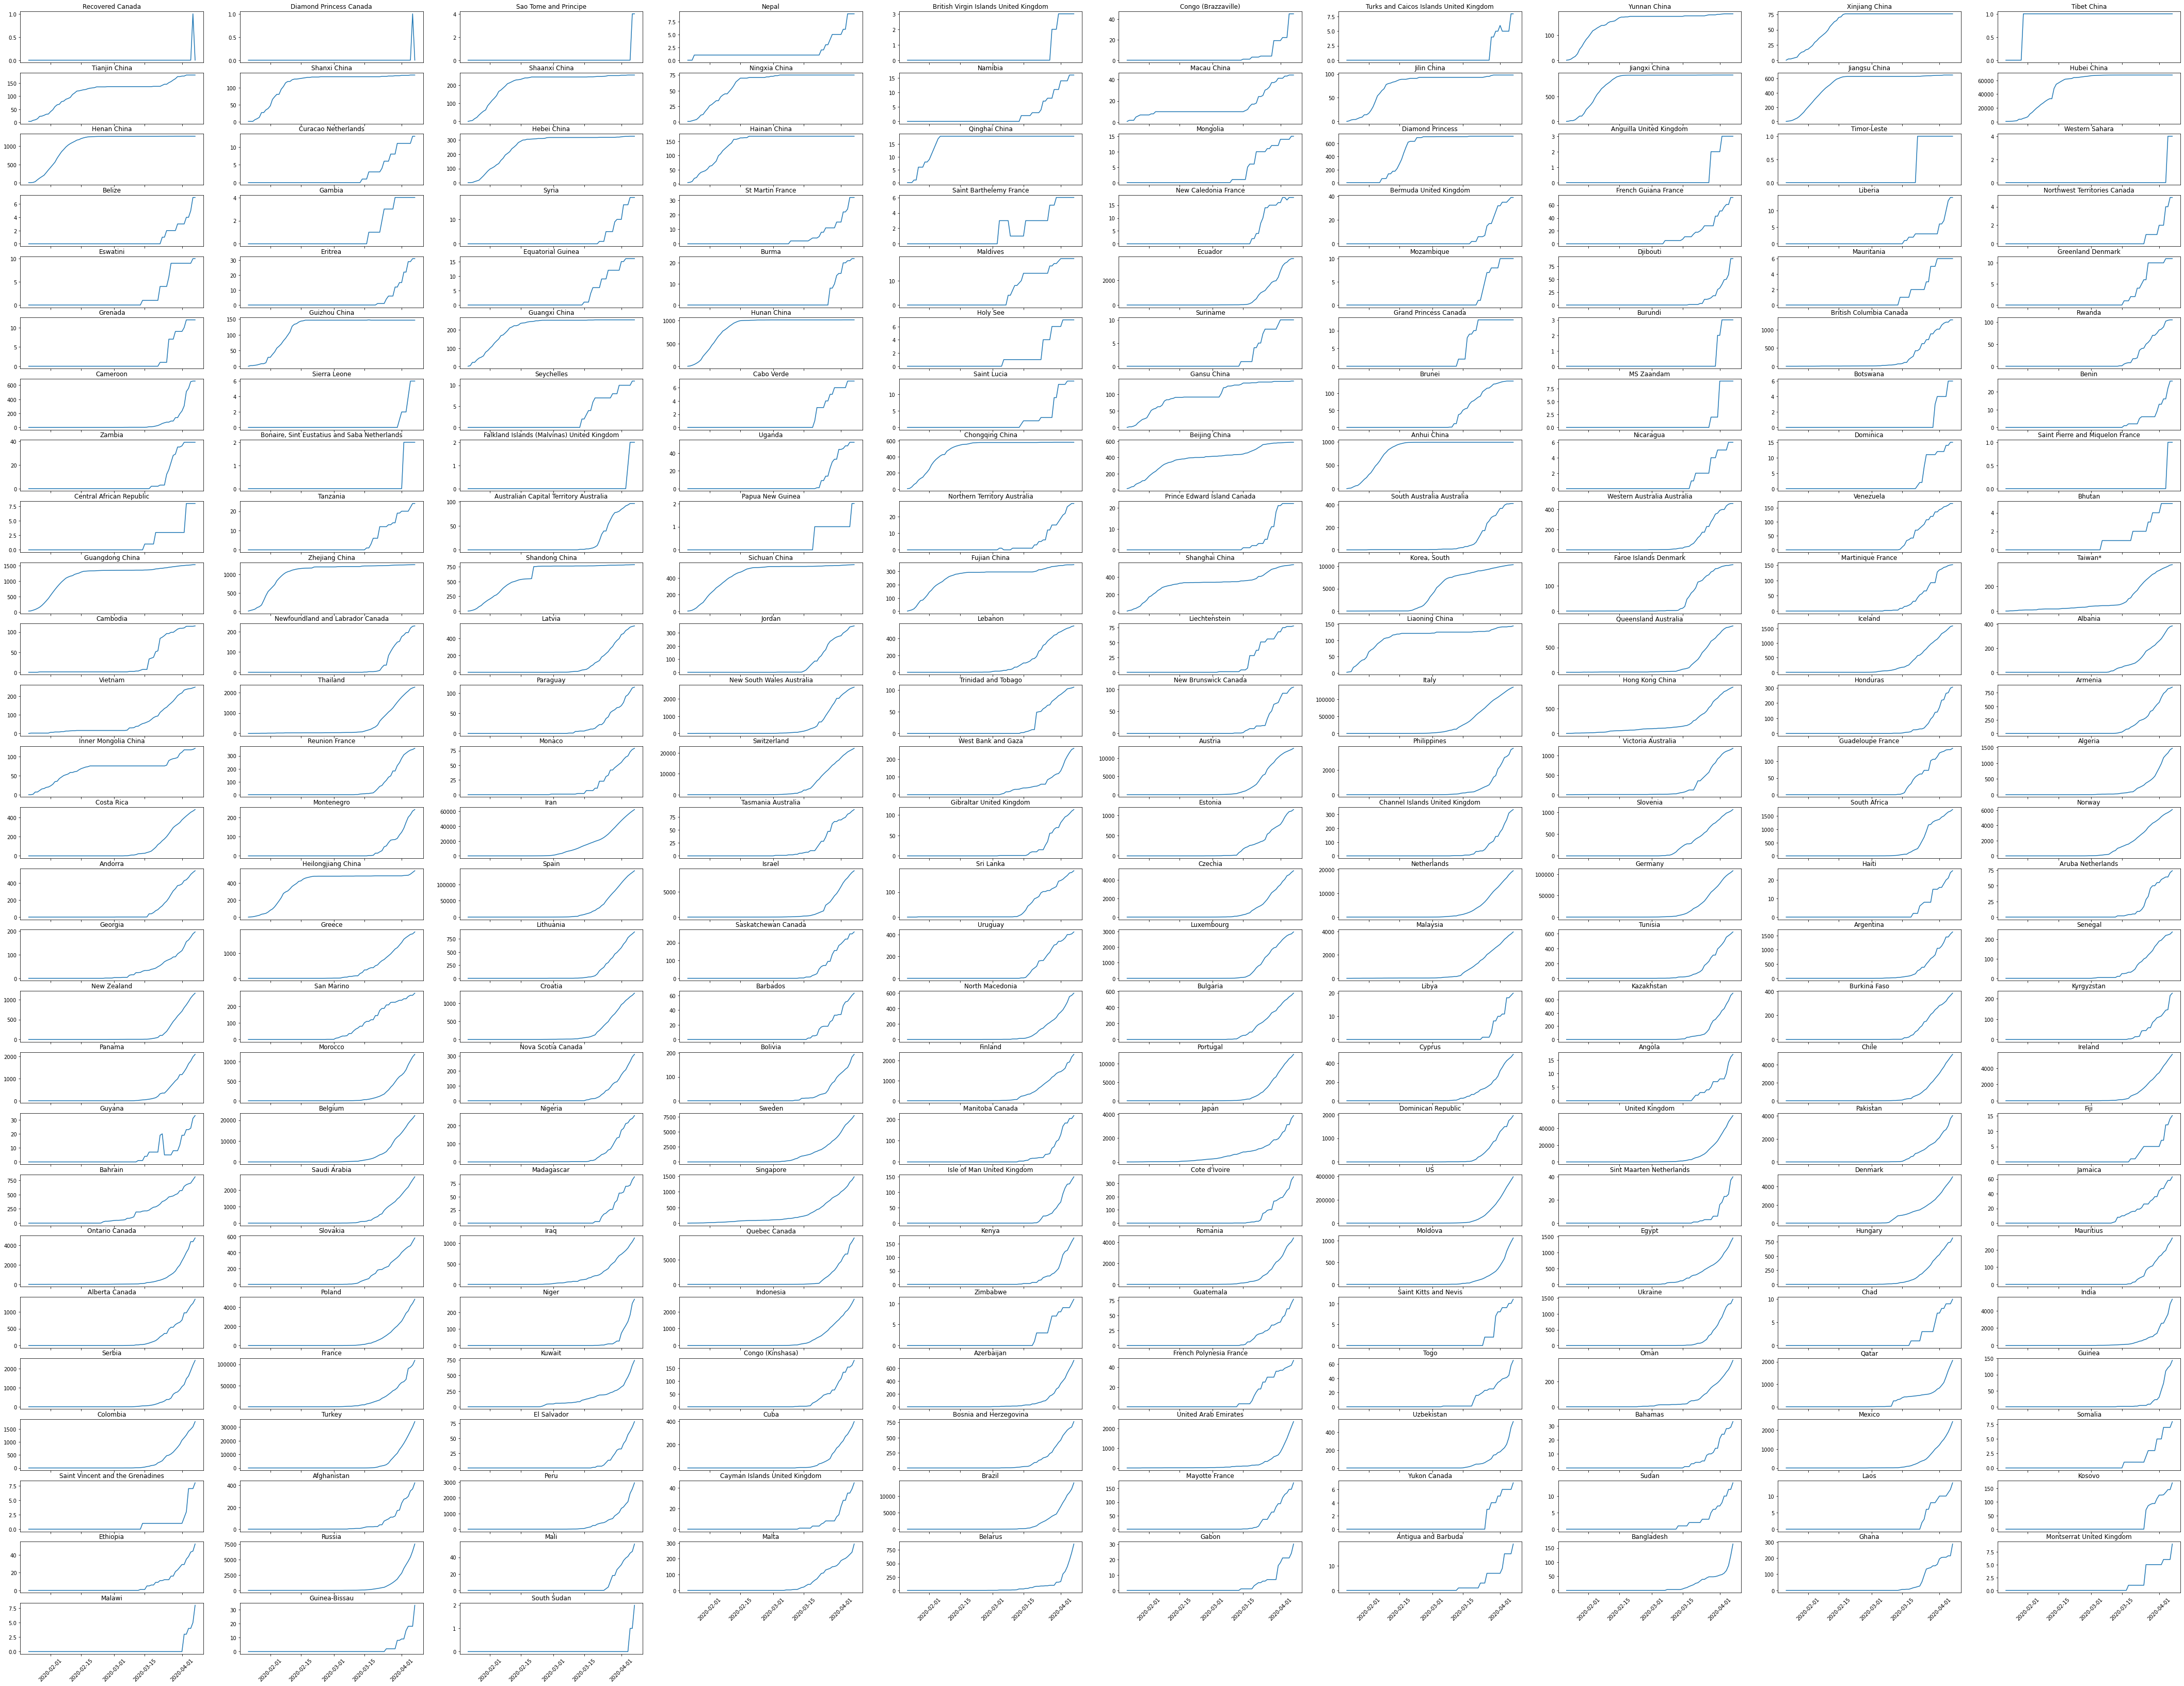

In [16]:
# create new dataframe named sorteddf that is the sorted versin of df_three, asorted by ascending growth factor (row index 1) * realized last minute that I calculated growth rate incorrectly so this is not actually sorted by correct growth rate, still deicded to show this graph because it helped me with finding ineresting graphs to shown)
sorteddf=df_three.sort_values(by=[1],axis=1)
sorteddf_new=pd.DataFrame(sorteddf,columns=df_three.sort_values(by=[1],axis=1).loc[0])
hi=df_three.sort_values(by=[1],axis=1).loc[0]
hi=hi.reset_index(drop=True)

sorteddf.columns=hi

plt.figure(figsize=(75,100))

sortedarray=np.array(sorteddf.loc[2:])
sortedarray_gfs=np.array(sorteddf.loc[1])
placessortedbygf=np.array(sorteddf.columns)

for i in range(0,numberofregions):
  plt.subplot(46,10,i+1);plt.plot(dates,sortedarray[:,i])
  plt.axis('tight')
  ax=plt.gca()
  #ax.set_ylim(0,1500)
  if i < numberofregions-10:
    ax.set_xticklabels([])
  if i >= numberofregions -10:
    plt.xticks(rotation=45)
  ax.set_title(str(placessortedbygf[i]))


This is the same as above except in just one column for another mode of viewing the sorted order.

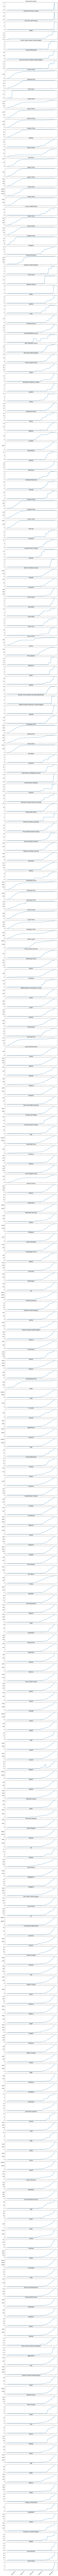

In [17]:
plt.figure(figsize=(10,500))

for i in range(0,numberofregions):
  plt.subplot(numberofregions,1,i+1);plt.plot(dates,sortedarray[:,i])
  plt.axis('tight')
  ax=plt.gca()
  #ax.set_ylim(0,1500)
  if i < numberofregions-1:
    ax.set_xticklabels([])
  if i >= numberofregions -1:
    plt.xticks(rotation=45)
  ax.set_title(str(placessortedbygf[i]))


Below, I created a function that would plot 2 graphs given a country:
1) confirmed cases over time graph and
2) growth factor over time graph

I want to plot growth factor over time to see when the growth factor is getting close to 1, indicating a possible point of inflection and end to the exponential part of the logistic curve.

In [0]:
def growthfactorovertime(country,fontsize=18):

  # PLOT 1: plot of growth over time 

  plt.figure(figsize=(15,6))

  regionaldata=np.array(sorteddf[country])
  line,=plt.plot(dates,regionaldata[2:],'om',alpha=.6)
  
  ax=plt.gca()

  ax.set_title('Confirmed cases over time for ' +str(country), ha='center',fontsize=fontsize)
  # Remove the plot frame lines. They are unnecessary here.
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Provide tick lines across the plot to help your viewers trace along
  # the axis ticks. Make sure that the lines are light and small so they
  # don't obscure the primary data lines.
  ax.grid(True, 'major', axis='both', ls='--', lw=.5, c='k', alpha=.3)

  # Remove the tick marks; they are unnecessary with the tick lines we just
  # plotted. Make sure your axis ticks are large enough to be easily read.
  # You don't want your viewers squinting to read your plot.
  ax.tick_params(axis='both', which='both',
                bottom=False, top=False, labelbottom=True,
                left=False, right=False, labelleft=True)
  ax.set_xlabel('Time',fontsize=fontsize)
  ax.set_ylabel('Confirmed Cases',fontsize=fontsize)

  ax.text(dates[-1],regionaldata[-1],regionaldata[-1],fontsize=fontsize,color=line.get_color())
  
  plt.show()

  # PLOT 2: GROWTH FACTOR OVER TIME 
  array=np.array(df_less[country])
  newarray=array[:-1]
  newarray=np.insert(newarray,0,0)
  changeof1day=array-newarray

  one=changeof1day[:-1]
  changeof2day=np.insert(one,0,0)

  changeof1day[changeof1day==0]=1
  changeof2day[changeof2day==0]=1
  growthfactors=changeof1day/changeof2day
  growthfactors[growthfactors==1]=-5

  fig=plt.figure(figsize=(15,6))
  ax=plt.gca()
  ax.set_ylabel('Growth Factor',fontsize=fontsize)
  ax.set_xlabel('Time',fontsize=fontsize)
  line, = plt.plot(dates,growthfactors,'Dc')

  # Remove the plot frame lines. They are unnecessary here.
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Provide tick lines across the plot to help your viewers trace along
  # the axis ticks. Make sure that the lines are light and small so they
  # don't obscure the primary data lines.
  ax.grid(True, 'major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
  ax.set_ylim(0,2)

  # Remove the tick marks; they are unnecessary with the tick lines we just
  # plotted. Make sure your axis ticks are large enough to be easily read.
  # You don't want your viewers squinting to read your plot.
  ax.tick_params(axis='both', which='both',
                bottom=False, top=False, labelbottom=True,
                left=False, right=False, labelleft=True)
  if growthfactors[-1]!=-5:
    ax.text(dates[-1],growthfactors[-1],'Current growth factor: '+('%1.4f' % (float(growthfactors[-1]))),fontsize=fontsize,color=line.get_color())

  redline=np.zeros(days)
  redline[redline==0]=1
  plt.plot(dates,redline,'y--')
  plt.title('Growth factor over time for ' + str(country),ha='center',fontsize=fontsize)
  plt.show


As shown by the graphs for Guangdong China, in a not messy logistic curve, the growth factor goes from > 1 during the exponential part --> approximately 1 at the inflection point --> < 1 as the curve is leveling out to the max number of cases (~2 times of the number of confirmed cases at the inflection point, which in this case is ~1400 since the inflection point is around 700 confirmed cases). The beginning of the Guangdong graph models a smooth logistic curve pretty well. 

For days when there was no growth in the number of cases, I just dropped those points from the growth factor over time graph.

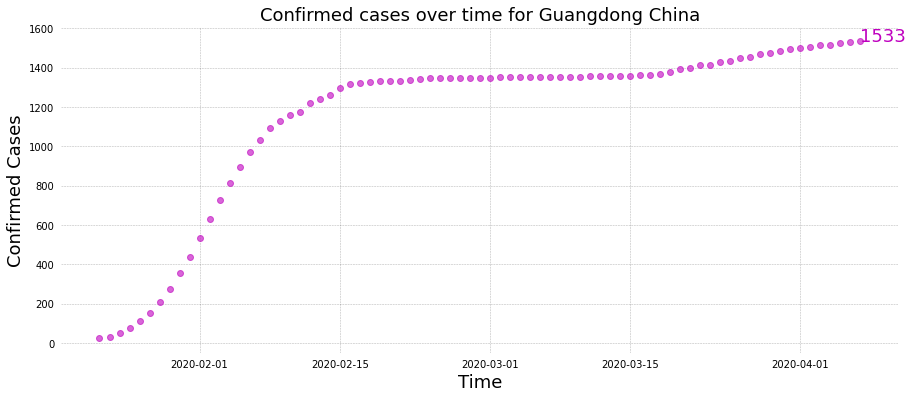

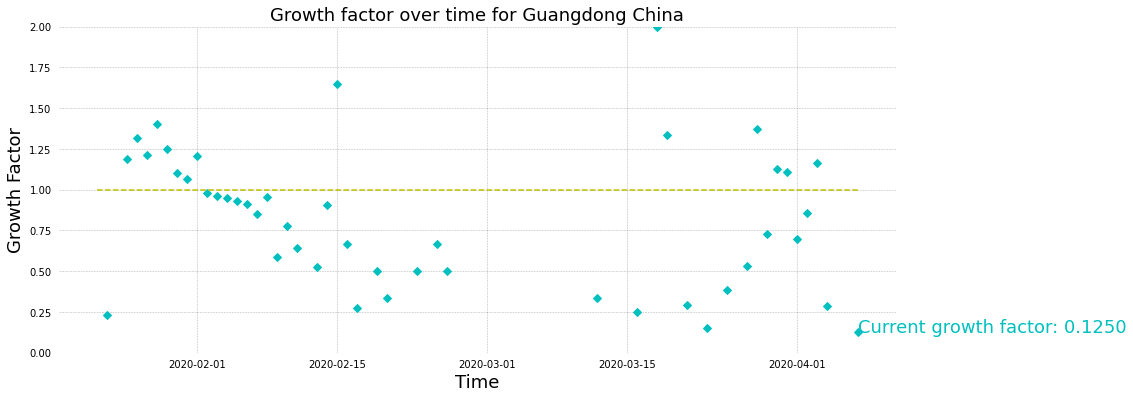

In [19]:
growthfactorovertime('Guangdong China')

## Not quite at inflection point: US

For the US, the growth factor is still well above 1, so we have not yet reached the inflection point and the cases are already at 243,453 as of April 2, 2020. This means that the number of cases will max out at a lot more than 2x 243,453 (>486,906 cases). But looking at the graph of growth factor over time, it looks like the US is approaching a growth factor of 1 soon if we continue on our current path. The general trend is that the growth factor is decreasing toward 1, but not quite yet.

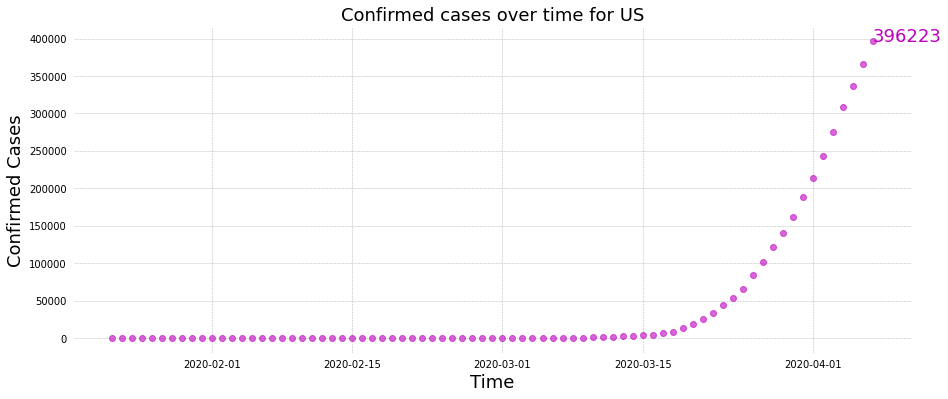

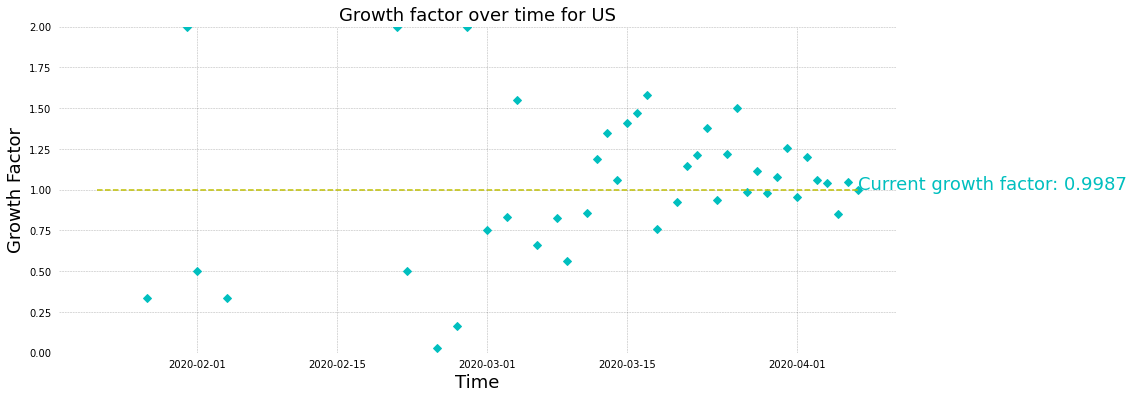

In [20]:
growthfactorovertime('US')

##Linear increase when supposed to level out: South Korea

For South Korea, the graph of the growth factor shows a decreasing trend from above 1 to below 1 when South Korea hit its inflection point around the start of March. However, the number of cases in South Korea have, instead of maxing out, have continued to climb in a relatively linear fashion...which is interesting.

 Hopefully it will not lead to the start of another exponential growth.

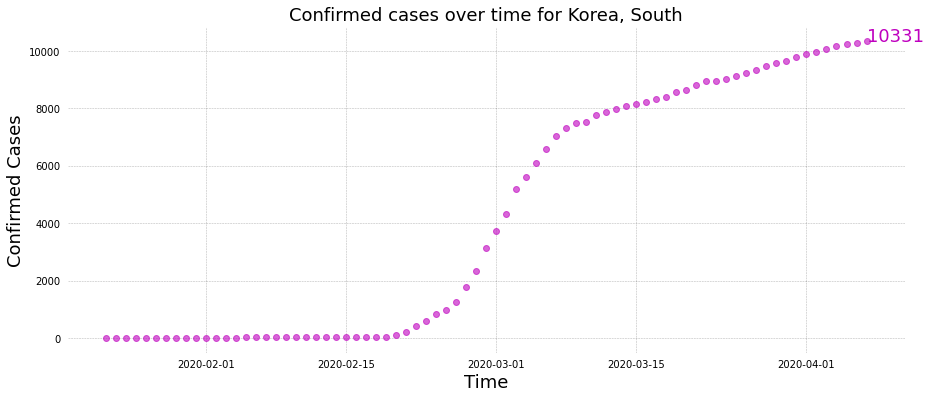

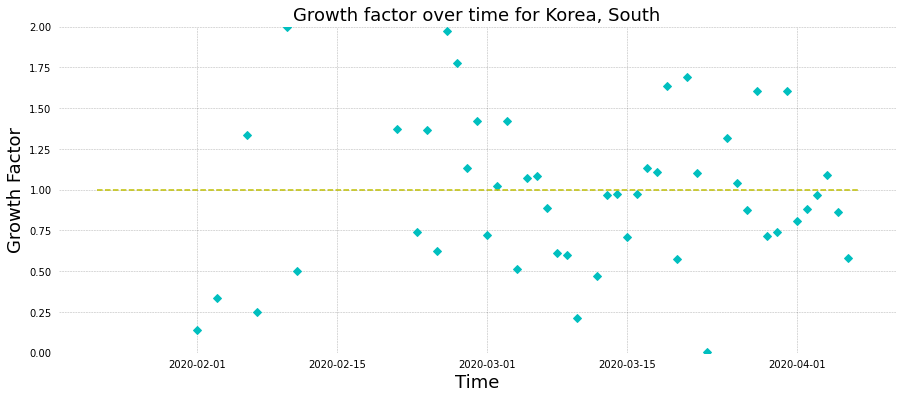

In [21]:
growthfactorovertime('Korea, South')

## Past exponential growth: Italy

As for Italy, it seems like they have just reached their inflection point around 2/3 of the way through March (hooray!). Most of the recent points on the growth factor graph are below 1 so it seems like Italy is now leveling out towards the max which should be around 160,000 confirmed cases if the inflection point is 80,000). 


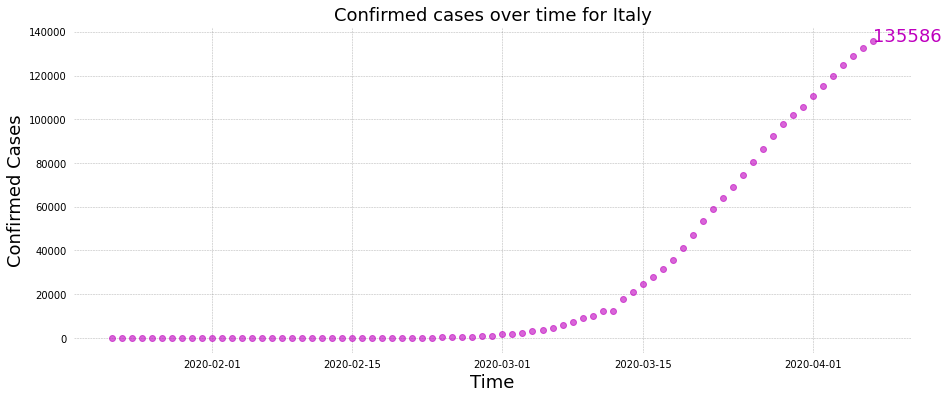

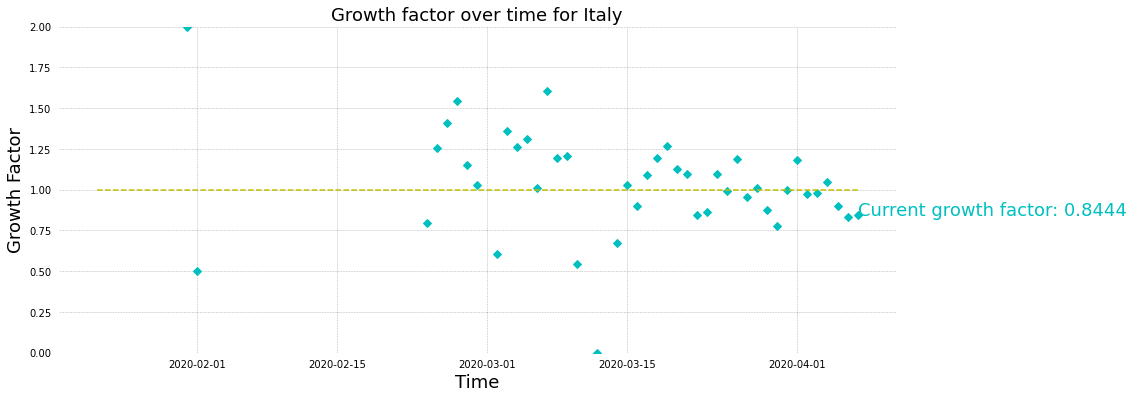

In [22]:
growthfactorovertime('Italy')

## Second logistic curve: Beijing, Shanghai, Fujian

As for Beijing China, they had an inflection point around early February and started leveling out around mid February but there another small inflection point occurred around March 20. 

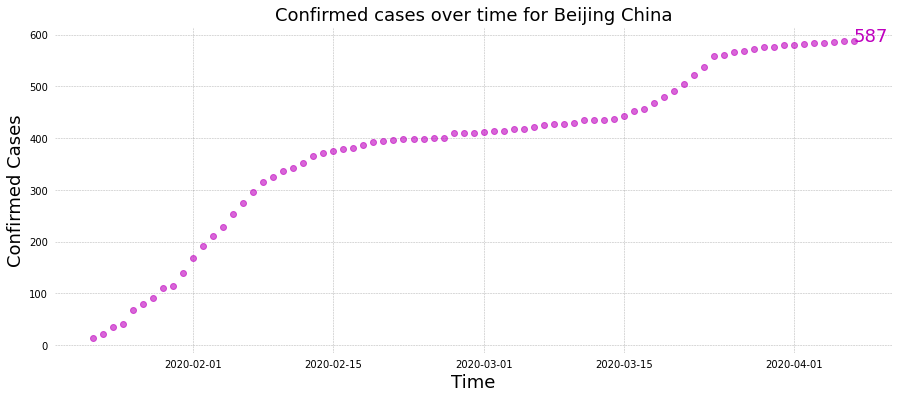

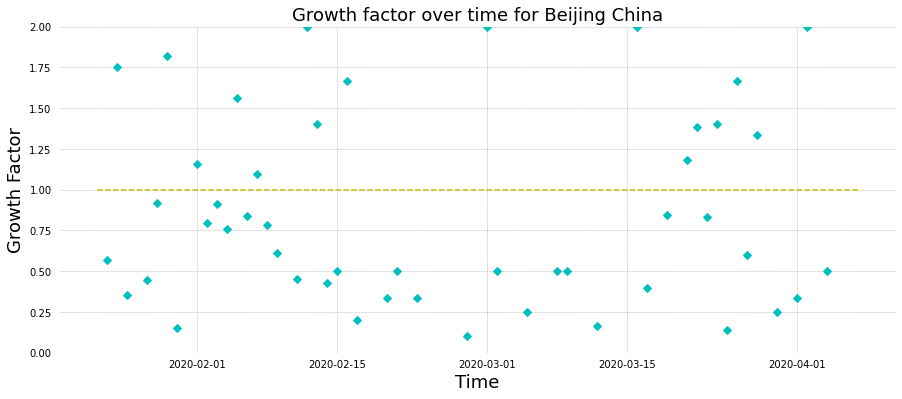

In [23]:
growthfactorovertime('Beijing China')

Shanghai and Fujian below exhibits simiar logistic curve as Beijing with an inflection point around early february and another smaller flare occurring in the second half of March and starting to level out around now (April 2).

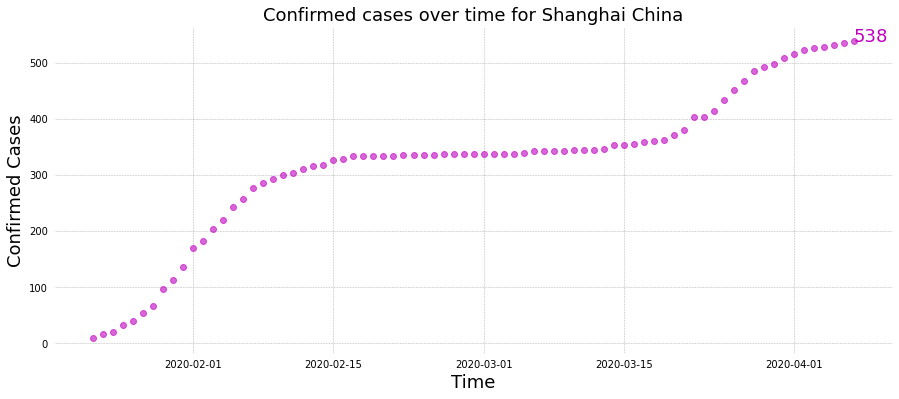

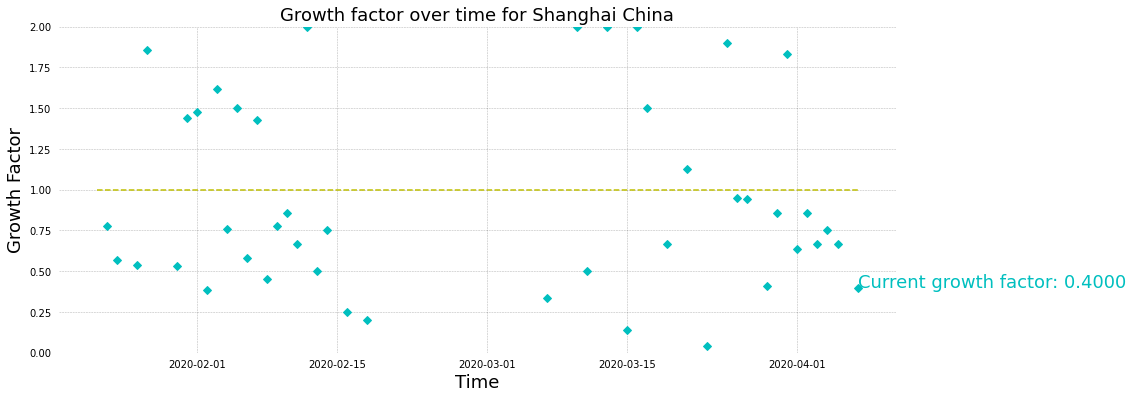

In [24]:
growthfactorovertime('Shanghai China')

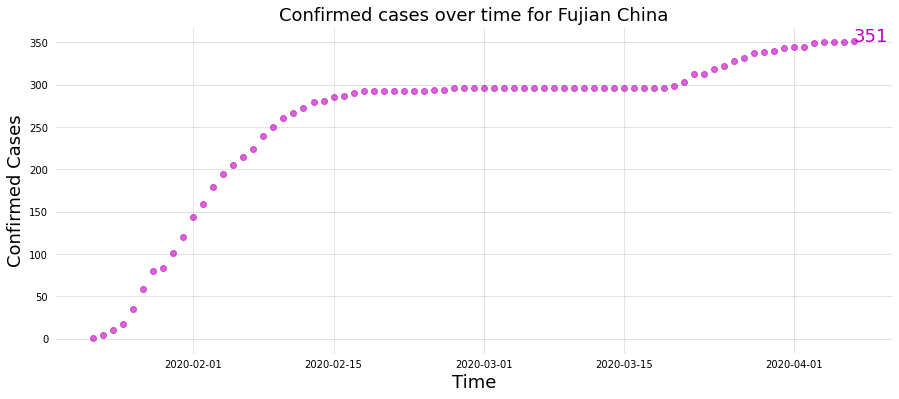

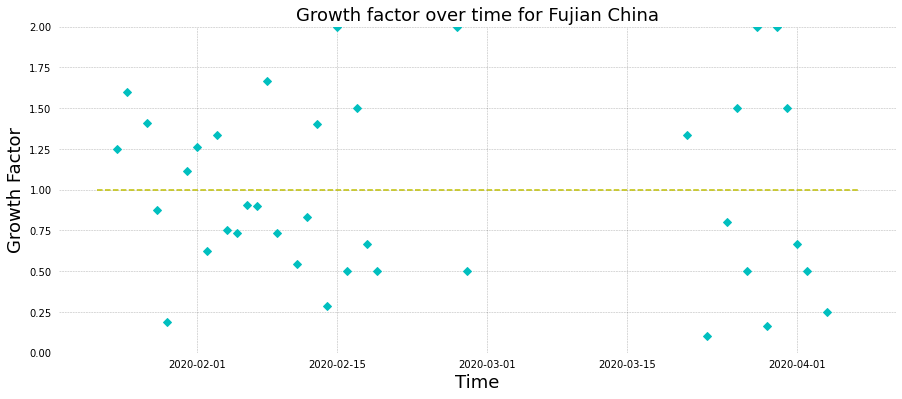

In [25]:
growthfactorovertime('Fujian China')

## Levelled out: Shaanxi China and Shanxi China

The following two provinces in the China exhibit similar trends in that there is a clear downward trend in the growth factor over time graph while the confirmed cases reaches the inflection point.

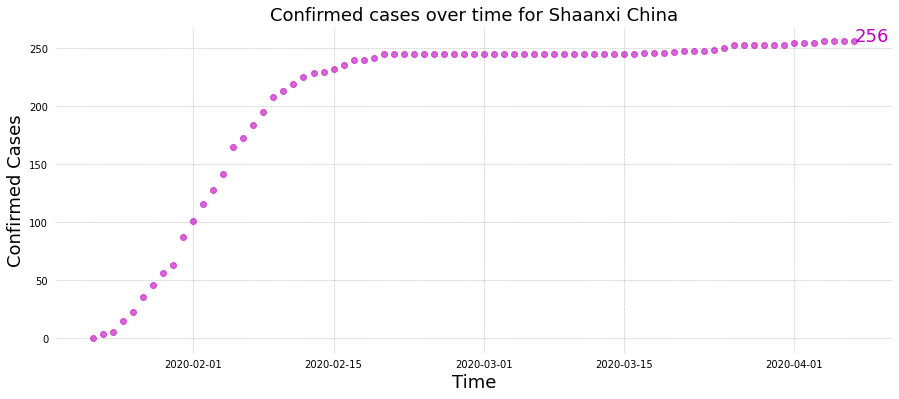

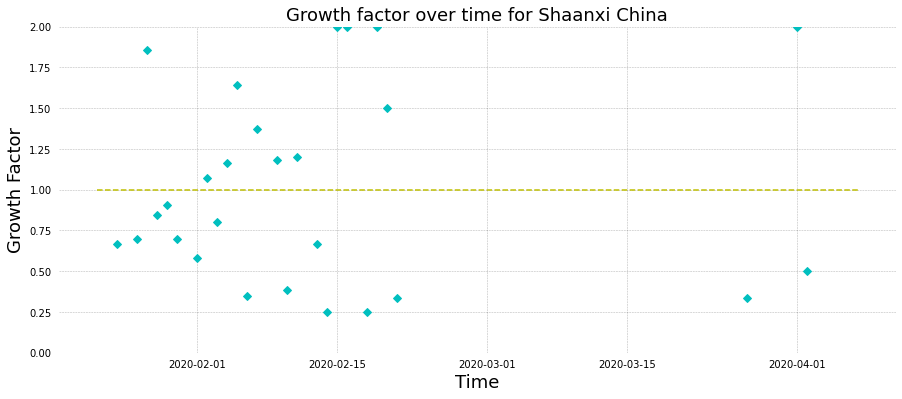

In [26]:
growthfactorovertime("Shaanxi China")

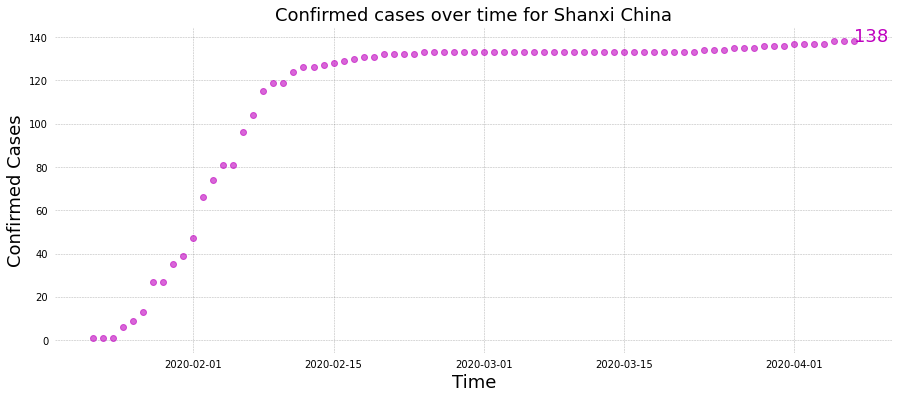

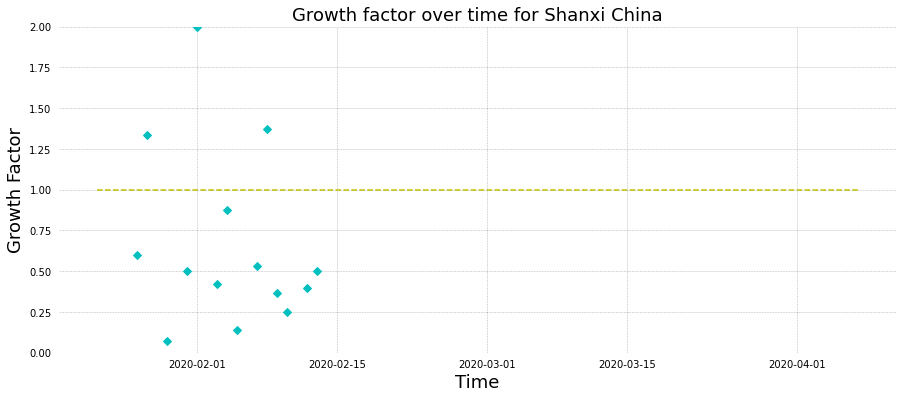

In [27]:
growthfactorovertime('Shanxi China')

# Future Directions



*  plot a best fit line for the growth factor over time graphs to more clearly visualize the downward trend around the inflection points.

*   somehow make predictions using machine learning algorithms

* graph San Francisco local data (see below :))




# San Francisco Data Visualization!

In [0]:
dates_array=np.array(dates)
newdates=[]
for i in range(len(dates)):
  string=str(dates_array[i])
  newdate=string[5:8]+string[8:10]+string[4]+string[0:4]
  newdates.append(newdate)
newdatesarray=np.array(newdates)

In [0]:
sf_data=[]
for i in range(60,len(newdatesarray)):
  link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+str(newdatesarray[i])+".csv"
  sf=pd.read_csv(link)
  sfdataonly=sf.loc[sf['FIPS']==6075]
  sf_data.append(np.array(sfdataonly['Confirmed']))
arrayofsfconfirmedcases=np.array(sf_data)
arrayofsfconfirmedcases=arrayofsfconfirmedcases.flatten()

In [0]:
datesafter322=dates[60:]

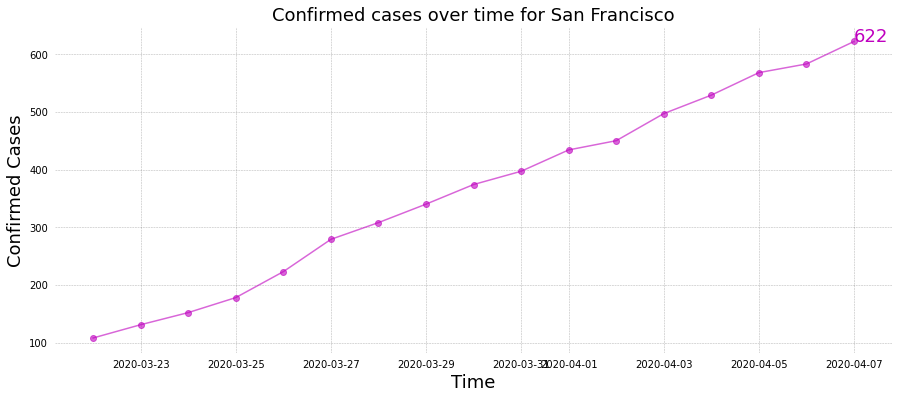

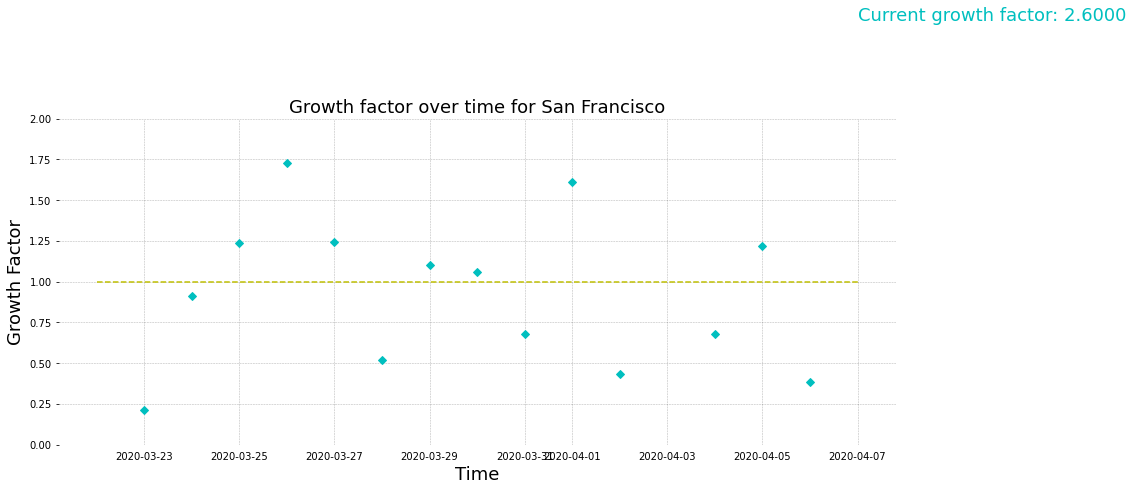

In [33]:
# PLOT 1: plot of growth over time 
fontsize=18
plt.figure(figsize=(15,6))

regionaldata=arrayofsfconfirmedcases

line,=plt.plot(datesafter322,regionaldata,'-om',alpha=.6)
  
ax=plt.gca()

ax.set_title('Confirmed cases over time for San Francisco', ha='center',fontsize=fontsize)
# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', axis='both', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both',
                bottom=False, top=False, labelbottom=True,
                left=False, right=False, labelleft=True)
ax.set_xlabel('Time',fontsize=fontsize)
ax.set_ylabel('Confirmed Cases',fontsize=fontsize)

ax.text(dates[-1],regionaldata[-1],regionaldata[-1],fontsize=fontsize,color=line.get_color())
  
plt.show();

# PLOT 2: GROWTH FACTOR OVER TIME 
array=arrayofsfconfirmedcases
newarray=array[:-1]
newarray=np.insert(newarray,0,0)
changeof1day=array-newarray

one=changeof1day[:-1]
changeof2day=np.insert(one,0,0)

changeof1day[changeof1day==0]=1
changeof2day[changeof2day==0]=1
growthfactors=changeof1day/changeof2day
growthfactors[growthfactors==1]=-5

fig=plt.figure(figsize=(15,6))
ax=plt.gca()
ax.set_ylabel('Growth Factor',fontsize=fontsize)
ax.set_xlabel('Time',fontsize=fontsize)
line, = plt.plot(dates[60:],growthfactors,'Dc')

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
ax.set_ylim(0,2)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both',
                bottom=False, top=False, labelbottom=True)

if growthfactors[-1]!=-5:
  ax.text(dates[-1],growthfactors[-1],'Current growth factor: '+('%1.4f' % (float(growthfactors[-1]))),fontsize=fontsize,color=line.get_color())

redline=np.zeros(days-60)
redline[redline==0]=1
plt.plot(dates[60:],redline,'y--')
plt.title('Growth factor over time for San Francisco',ha='center',fontsize=fontsize)
plt.show;


In the graphs above, we have the data for confirmed cases of COVID-19 in San Francisco, CA. There does not seem to be a clear logistic curve which is interesting... looks pretty linear from 3-22-2020 to now (4-7-2020).

In [28]:
print('Data last updated on '+str(dates_array[-1])+'.')

Data last updated on 2020-04-07T00:00:00.000000000.
